In [3]:
import numpy as np
from collections import Counter
from scipy import interpolate
import time
#import pymultinest
import warnings
import sys
import argparse

In [4]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config 
from astropy import units as u
from astropy.coordinates import SkyCoord

In [5]:
#from astroquery.irsa import Irsa  

In [6]:
FRBcatalogue220807=pd.read_csv('/Volumes/ExtremeSSD/Papers_classification/FRB/FRB_statistic/FRBcatalogue220807.csv')

In [7]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#
from scipy import stats 

import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [8]:
#from adjustText import adjust_text

def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

def drop_index(data):
    data=data.reset_index(drop=True)
    return data
    

In [9]:
FRBcatalogue220807.columns

Index(['frb', 'utc', 'mjd', 'telescope', 'ra', 'dec', 'l', 'b', 'frequency',
       'dm', 'flux', 'width', 'fluence', 'snr', 'reference', 'redshift'],
      dtype='object')

In [10]:
min(FRBcatalogue220807['flux']),max(FRBcatalogue220807['flux'])

('-', '9')

In [11]:
FRBcatalogue220807_flux=FRBcatalogue220807[FRBcatalogue220807['flux'].str.contains('-')==False]

FRBcatalogue220807_flux=drop_index(FRBcatalogue220807_flux)

In [12]:
len(FRBcatalogue220807_flux),len(FRBcatalogue220807)

(653, 811)

In [13]:
min(FRBcatalogue220807_flux['flux']),max(FRBcatalogue220807_flux['flux'])

('0.0142', '9')

In [16]:
FRBcatalogue220807_flux['flux_float']=[float(i) for i in FRBcatalogue220807_flux['flux']]



In [17]:
FRBcatalogue220807_fluence=FRBcatalogue220807[FRBcatalogue220807['fluence'].str.contains('-')==False]
FRBcatalogue220807_fluence=drop_index(FRBcatalogue220807_fluence)
FRBcatalogue220807_fluence['fluence_float']=[float(i) for i in FRBcatalogue220807_fluence['fluence']]

In [21]:
min(FRBcatalogue220807_fluence['fluence_float']),max(FRBcatalogue220807_fluence['fluence_float'])

(0.042, 3500.0)

FRBcatalogue220807_flux['flux_float']

In [34]:
ax.hist?

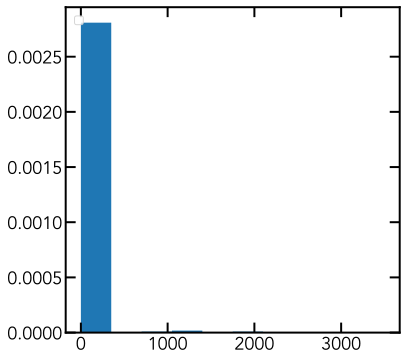

In [35]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

ax.hist(FRBcatalogue220807_fluence['fluence_float'],density=True)

#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))

set_ax_tick(ax)
#ax.set_xlim(0,200)


#ax.set_title('PKS 1510')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.show()
plt.close()

We model the FRB energy distribution with a
Schechter (1976) function

In [32]:
np.e

2.718281828459045

# def Schechter_function

In [ ]:
def Schechter_function(E,pE,Echar,gamma,A):
    pE=A*1.0/Echar*(E/Echar)**gamma*np.e**(-(E/Echar))

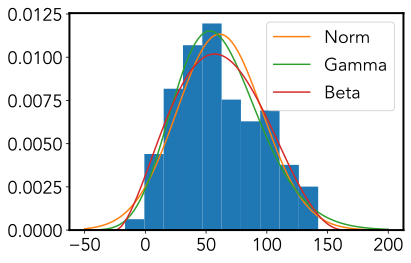

In [38]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(ser, density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ser)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.legend()
plt.show()  